In [ ]:
%load_ext autoreload
%autoreload 2
%cd ..
import numpy as np
import matplotlib.pyplot as plt
from src.ortools_solver import CVRP_solver
from src.utils import random_choose_candidate_2
from src.pipette_scheduler import calculate_D, calculate_S_E, calculate_D_prime,calculate_X
import pandas as pd

/Users/roywu/Desktop/MIT/Project/pipette_scheduling


In [6]:
np.random.seed(0)
num_candidates = 2000
a = random_choose_candidate_2(96,96,num_candidates)
D_S = calculate_D(a.shape[0])
D_D = calculate_D(a.shape[1])
S, E, volumes = calculate_S_E(a)
# calculate distance matrix
D_prime = calculate_D_prime(D_S, D_D, S, E, volumes, 1, 100, 1, 100)
# VRP solver
VRP_distance, VRP_recorder = CVRP_solver((D_prime * 100).astype(np.int64), solving_time=20)


In [2]:
stats = []
np.random.seed(0)
for r in range(6):
    num_candidates = 2000
    a = random_choose_candidate_2(96,96,num_candidates)
    D_S = calculate_D(a.shape[0])
    D_D = calculate_D(a.shape[1])
    S, E, volumes = calculate_S_E(a)
    # calculate distance matrix
    D_prime = calculate_D_prime(D_S, D_D, S, E, volumes, 1, 100, 1, 100)

    for i in range(2,71,2):
        # VRP solver
        VRP_distance, VRP_recorder = CVRP_solver(np.round(D_prime*100).astype(np.int64), solving_time=i)
        VRP_distance = VRP_distance / 100
        print(f'VRP_distance: {VRP_distance}')
        stats.append([r,i, VRP_distance])

VRP_distance: 3374.0
VRP_distance: 3374.0
VRP_distance: 3352.08
VRP_distance: 3323.87
VRP_distance: 3296.8
VRP_distance: 3276.18
VRP_distance: 3265.32
VRP_distance: 3256.33
VRP_distance: 3250.51
VRP_distance: 3248.12
VRP_distance: 3245.72
VRP_distance: 3244.08
VRP_distance: 3232.09
VRP_distance: 3216.74
VRP_distance: 3212.12
VRP_distance: 3209.33
VRP_distance: 3209.33
VRP_distance: 3209.33
VRP_distance: 3209.17
VRP_distance: 3207.8
VRP_distance: 3205.68
VRP_distance: 3203.4
VRP_distance: 3201.08
VRP_distance: 3198.87
VRP_distance: 3198.87
VRP_distance: 3198.27
VRP_distance: 3196.06
VRP_distance: 3196.06
VRP_distance: 3196.06
VRP_distance: 3196.06
VRP_distance: 3196.06
VRP_distance: 3195.97
VRP_distance: 3195.97
VRP_distance: 3195.97
VRP_distance: 3195.92
VRP_distance: 3420.14
VRP_distance: 3420.14
VRP_distance: 3390.48
VRP_distance: 3364.4
VRP_distance: 3337.68
VRP_distance: 3326.11
VRP_distance: 3307.99
VRP_distance: 3298.9
VRP_distance: 3294.75
VRP_distance: 3293.23
VRP_distance: 331

In [3]:
stats_df = pd.DataFrame(stats, columns=['repeats','time','VRP_distance'])
stats_df.to_csv('/Users/roywu/Desktop/MIT/Project/pipette_scheduling/results/VRP_distance_wall_time.csv', index=False)

(array([3150., 3200., 3250., 3300., 3350., 3400., 3450., 3500.]),
 [Text(0, 3150.0, '3150'),
  Text(0, 3200.0, '3200'),
  Text(0, 3250.0, '3250'),
  Text(0, 3300.0, '3300'),
  Text(0, 3350.0, '3350'),
  Text(0, 3400.0, '3400'),
  Text(0, 3450.0, '3450'),
  Text(0, 3500.0, '3500')])

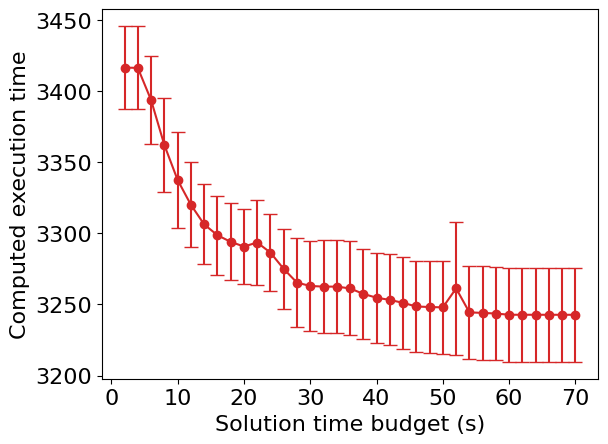

In [4]:
stats_df = pd.read_csv('/Users/roywu/Desktop/MIT/Project/pipette_scheduling/results/VRP_distance_wall_time.csv')# group by time and calculate the mean and standard deviation
stats_df_grouped = stats_df.groupby('time').agg({'VRP_distance': ['mean', 'std']}).reset_index()
# plot the results
plt.errorbar(stats_df_grouped['time'], stats_df_grouped[('VRP_distance', 'mean')], yerr=stats_df_grouped[('VRP_distance', 'std')], fmt='o-', capsize=5, color='#d62728')
plt.xlabel('Solution time budget (s)', fontsize=16)
#plt.title('Number of jobs = 2000', fontsize=16)
plt.ylabel('Computed execution time', fontsize=16)
# tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)